<a href="https://colab.research.google.com/github/yasminbottan/regressao/blob/main/Projeto_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION**

## **Resumo:**
Uma empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA instalando sua unidade de fabricação lá e produzindo carros localmente para dar concorrência às suas contrapartes americanas e europeias.

## **Variáveis:**
* Car_ID: ID exclusivo de cada observação
* Simbolização: Sua classificação de risco de seguro atribuída, um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bem seguro.
* carCompany: Nome da empresa de automóveis
* fueltype: Tipo de combustível do carro, ou seja, gasolina ou diesel
* aspiration: Aspiração usada em um carro
* doornumber: Número de portas em um carro
* carbody: corpo do carro
* drivewheel: tipo de roda motriz
* enginelocation: Localização do motor do carro
* wheelbase: Weelbase do carro
* carlength: Comprimento do carro
* carwidth: Largura do carro
* carheight: altura do carro
* curbweight: O peso de um carro sem ocupantes ou bagagem
* enginetype: Tipo de motor
* cylindernumber: cilindro colocado no carro
* enginesize: Tamanho do carro
* fuelsystem: Sistema de combustível do carro
* boreratio: Boreratio do carro
* stroke: Curso ou volume dentro do motor
* compressionratio: taxa de compressão do carro
* horsepower: Horsepower
* peakrpm: rpm de pico do carro
* citympg: Quilometragem na cidade
* highwaympg: Quilometragem na rodovia

## **Target:**
* price: Preço do carro

## **Fonte:**
https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data

# **BIBLIOTECAS, FONTES E BASE DE DADOS**

In [1]:
# instalando o pacote feature-engine
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 2.1 MB/s eta 0:00:00


In [2]:
pip install --upgrade scikit-learn xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [3]:
# manipulação de dados
import pandas as pd
import numpy as np
import time

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from tabulate import tabulate

# regressão linear
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import SelectByShuffling

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas de avaliação
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, max_error, mean_squared_log_error
from scipy.stats import f_oneway

In [5]:
# Carregar base de dados
df = pd.read_csv('CarPrice_Assignment.csv', encoding='latin1', delimiter=',')

# **PREPARAÇÃO DA BASE**

In [6]:
# Verificação das informações da tabela
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Verificando formato da base criada
df.shape

(205, 26)

In [8]:
# dtype de cada coluna
df.dtypes

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [9]:
# verifica missing values
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


**Conclusão:** Não há valores nulos

In [10]:
# verifica linhas duplicadas
df.duplicated().sum()

0

**Conclusão:** Não há linhas duplicadas.

In [11]:
# sumário estatístico df_total
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Conclusão:** Não foi identificado nenhum valor fora da normalidade

# **DEFINIÇÃO TARGET E VARIÁVEIS**

De início já é possivel verificar que nao serão necessárias as informações **car_ID** e **CarName** de porque se tratam de dados unico e exclusivo de cada indivíduo

In [12]:
# Exlusão das variáveis car_ID e CarName

df = df.drop(columns=['car_ID', 'CarName'])

In [13]:
# Definição target e variáveis numéricas e categóricas

target = ['price']

cat_vars = [col for col in df.select_dtypes(include='object').columns]
num_vars = [col for col in df.columns if col not in cat_vars + target]

features = cat_vars + num_vars

### Análise: Variável Categórica

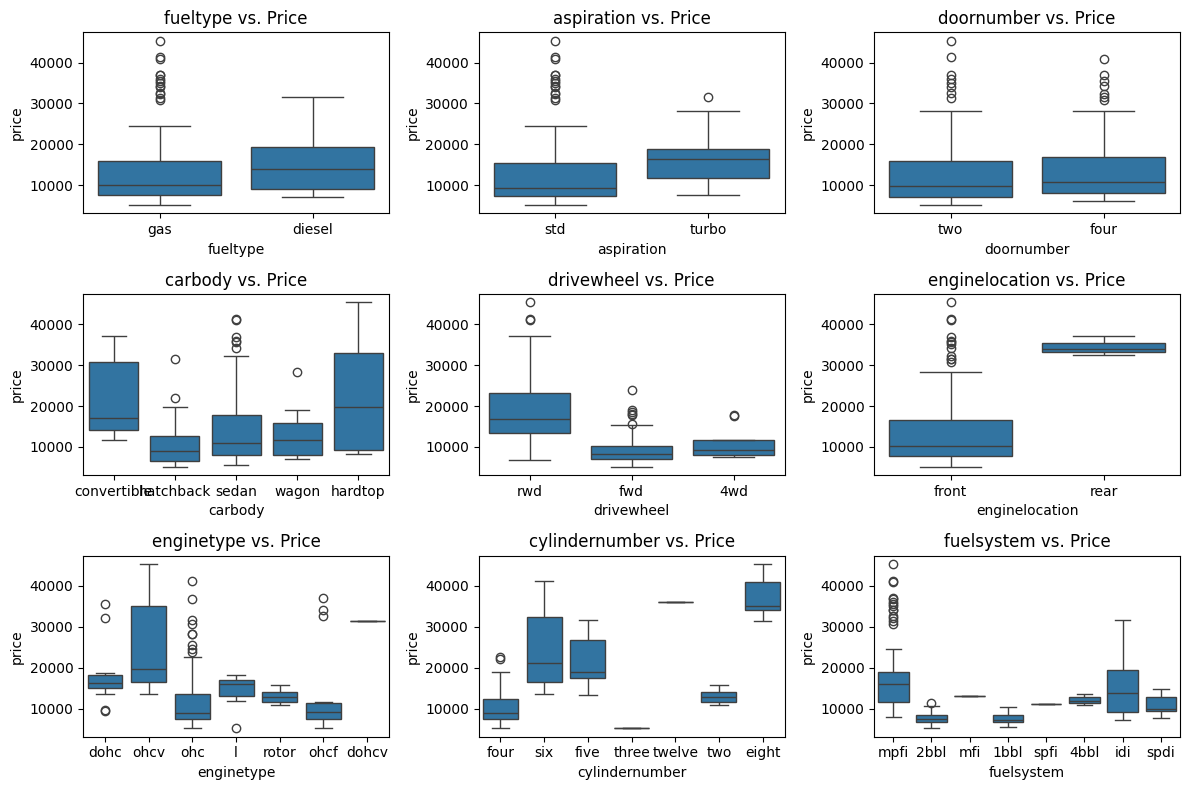

In [14]:
# Análise de correlação das variáveis categóricas x target
# Quando as médias das categorias estão muito próximas significa que não são representativas para o modelo

plt.figure(figsize=(12, 8))
for feature in cat_vars:
    plt.subplot(3, 3, cat_vars.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

In [15]:
# Análise de correlação das variáveis categóricas x target
# Quando o p-valor é maior (>) que 0,05 então a variável não é representativa para o modelo

anova_results = {}

# Aplicar ANOVA para cada variável categórica
for feature in cat_vars:
    groups = [df[df[feature] == cat]['price'] for cat in df[feature].unique()]

    # Verificar se há pelo menos duas categorias com valores
    if len(groups) > 1:
        anova_result = f_oneway(*groups)
        anova_results[feature] = {'p-valor': anova_result.pvalue}

# Exibir os resultados
for feature, result in anova_results.items():
    print(f"{feature}: p-valor = {result['p-valor']:.4f}")


fueltype: p-valor = 0.1315
aspiration: p-valor = 0.0107
doornumber: p-valor = 0.6504
carbody: p-valor = 0.0000
drivewheel: p-valor = 0.0000
enginelocation: p-valor = 0.0000
enginetype: p-valor = 0.0000
cylindernumber: p-valor = 0.0000
fuelsystem: p-valor = 0.0000


**Conclusão:** As variáveis **fueltype** e **doornumber** possuem as médias muito próximas entre as categorias e p-valor > 0,05.

Portanto, não são relevantes e devem ser excluídas do modelo.

### Análise: Variável Numérica

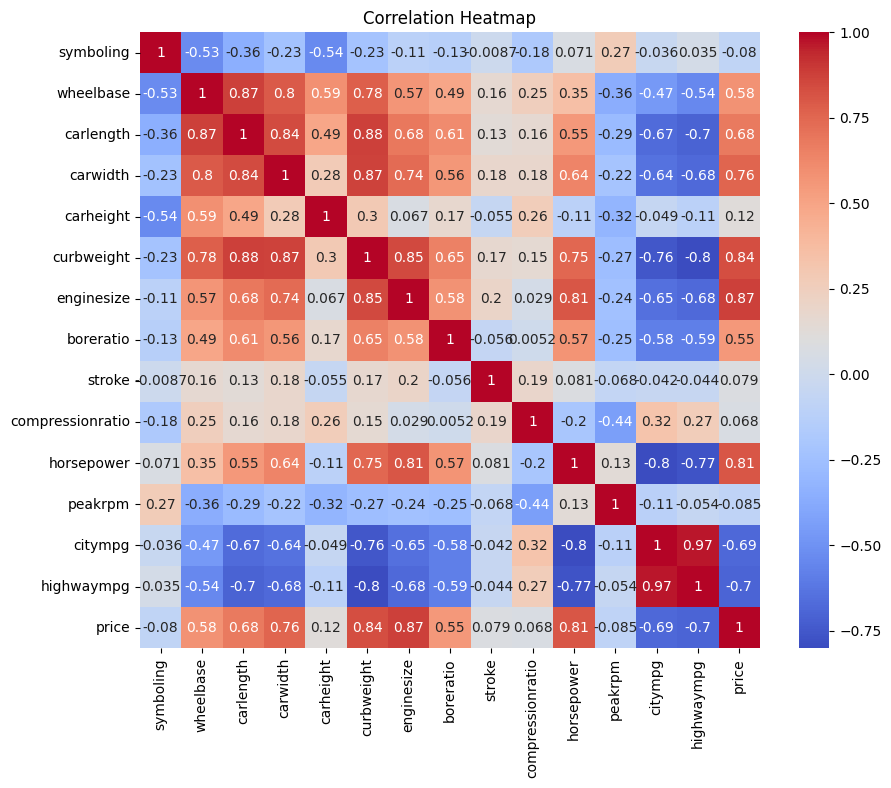

In [16]:
# Correlation Analysis (heat map - mapa de calor)
# Quando a correlação for menor (>) que |0,03|, então a variável não será representativa para o modelo

corr_vars = [col for col in df.columns if col in num_vars + target]

correlation_matrix = df[corr_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Conclusão:** As variáveis **symboling**, **carheight**, **stroke**, **compressionratio** e **peakrpm** possuem correlação < 0,3.

Portanto, não são relevantes e devem ser excluídas do modelo.


In [17]:
# Exclusão de variáveis não relevantes para o modelo

cat_vars = [col for col in cat_vars if col not in ['fueltype' ,'doornumber']]
num_vars = [col for col in num_vars if col not in ['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']]

features = cat_vars + num_vars

In [18]:
# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X = df[features].copy()
y = df[target].copy()

# selecionando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

## **APLICANDO REGRESSÃO LINEAR MÚLTIPLA**


In [19]:
# Parametrização do Pipeline de pré-processamento de modelos lineares

steps_modelos_lineares = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars)),
    ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

In [20]:
steps_modelos_lineares.fit_transform(X_train).head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,aspiration_std,...,cylindernumber_twelve,cylindernumber_three,fuelsystem_mpfi,fuelsystem_idi,fuelsystem_2bbl,fuelsystem_spdi,fuelsystem_1bbl,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_spfi
1,-1.640305,-0.423030,-0.842998,-0.041993,0.045331,0.491026,0.140352,-0.595370,-0.496575,1,...,0,0,1,0,0,0,0,0,0,0
112,1.446617,0.982411,1.166745,1.315706,0.571227,1.336370,-0.276730,0.475923,0.383839,0,...,0,0,0,1,0,0,0,0,0,0
162,-0.504702,-0.619321,-0.702783,-0.828841,-0.719609,-0.538089,-0.928420,0.475923,0.530575,1,...,0,0,0,0,1,0,0,0,0,0
87,-0.408735,-0.140372,-0.235401,-0.321633,-0.432756,-0.611597,0.270690,-0.289286,-0.056368,0,...,0,0,0,0,0,1,0,0,0,0
99,-0.264786,-0.061855,-0.328877,-0.473988,-0.193713,-0.023532,-0.224595,0.322881,0.530575,1,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Parametrização do Pipeline de pré-processamento de modelos NÃO lineares

steps_modelos_nao_lineares = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(imputation_method='median', variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

In [22]:
steps_modelos_nao_lineares.fit_transform(X_train).head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,aspiration_std,...,cylindernumber_twelve,cylindernumber_three,fuelsystem_mpfi,fuelsystem_idi,fuelsystem_2bbl,fuelsystem_spdi,fuelsystem_1bbl,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_spfi
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,1,0,0,0,0,0,0,0
112,107.9,186.7,68.4,3252,152,3.70,95,28,33,0,...,0,0,0,1,0,0,0,0,0,0
162,95.7,166.3,64.4,2140,98,3.19,70,28,34,1,...,0,0,0,0,1,0,0,0,0,0
87,96.3,172.4,65.4,2403,110,3.17,116,23,30,0,...,0,0,0,0,0,1,0,0,0,0
99,97.2,173.4,65.2,2324,120,3.33,97,27,34,1,...,0,0,0,0,1,0,0,0,0,0


# **MÉTRICAS DE AVALIAÇÃO**

In [23]:
# Parametrização de Modelos

modelos_lineares = [
    ('ridge_reg', Ridge(random_state=42)),
    ('linearregression', LinearRegression()),
    ('sgdregressor', SGDRegressor(random_state=42))
]

modelos_nao_lineares = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgboost', XGBRegressor(random_state=42)),
    ('catboost', CatBoostRegressor(random_state=42))
]


In [24]:
# Tabela com resultado das métricas de avaliação do modelo linear

df_resultados_ml = pd.DataFrame(columns=['algoritmo', 'base', 'R2', 'MSE', 'MAE', 'MAPE'])

for nome, modelo in modelos_lineares:
    print(nome, modelo)
    # criar pipeline com algoritimo na última etapa
    model_pipe = Pipeline(steps=steps_modelos_lineares.steps + [(nome,modelo)])

    # treinar o modelo nome var.fit
    model_pipe.fit(X_train, y_train)

    # fazer o predict na base de treino
    y_pred_train = model_pipe.predict(X_train)

    # calcular as métricas para o predict na base de treino
    df_resultados_ml.loc[len(df_resultados_ml)] = [
        nome,
        'train',
        r2_score(y_train, y_pred_train),
        mean_squared_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_percentage_error(y_train,y_pred_train)
    ]

    # fazer o predict na base de teste
    y_pred_test = model_pipe.predict(X_test)

    # calculas as métricas para o predict na base de teste
    df_resultados_ml.loc[len(df_resultados_ml)] = [
        nome,
        'test',
        r2_score(y_test, y_pred_test),
        mean_squared_error(y_test, y_pred_test),
        mean_absolute_error(y_test, y_pred_test),
        mean_absolute_percentage_error(y_test,y_pred_test)
    ]



ridge_reg Ridge(random_state=42)
linearregression LinearRegression()
sgdregressor SGDRegressor(random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados_ml.loc[df_resultados_ml['base'] == 'train'].sort_values(by='R2', ascending=False)

,algoritmo,base,R2,MSE,MAE,MAPE
2,linearregression,train,0.9214,5106338.5987,1609.5244,0.1275
0,ridge_reg,train,0.9157,5475125.0283,1646.7168,0.1315
4,sgdregressor,train,0.9062,6092012.8311,1754.8278,0.1394


In [26]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados_ml.loc[df_resultados_ml['base'] == 'test'].sort_values(by='R2', ascending=False)

,algoritmo,base,R2,MSE,MAE,MAPE
5,sgdregressor,test,0.8753,6882519.4338,1843.5256,0.1472
1,ridge_reg,test,0.8695,7204414.9664,1735.4474,0.1369
3,linearregression,test,0.7313,14836072.1457,2017.8058,0.1418


In [27]:
# Tabela com resultado das métricas de avaliação do modelo linear

df_resultados_mnl = pd.DataFrame(columns=['algoritmo', 'base', 'R2', 'MSE', 'MAE', 'MAPE'])

for nome, modelo in modelos_nao_lineares:
    print(nome, modelo)
    # criar pipeline com algoritimo na última etapa
    model_pipe = Pipeline(steps=steps_modelos_nao_lineares.steps + [(nome,modelo)])

    # treinar o modelo nome var.fit
    model_pipe.fit(X_train, y_train)

    # fazer o predict na base de treino
    y_pred_train = model_pipe.predict(X_train)

    # calcular as métricas para o predict na base de treino
    df_resultados_mnl.loc[len(df_resultados_mnl)] = [
        nome,
        'train',
        r2_score(y_train, y_pred_train),
        mean_squared_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_percentage_error(y_train,y_pred_train)
    ]

    # fazer o predict na base de teste
    y_pred_test = model_pipe.predict(X_test)

    # calculas as métricas para o predict na base de teste
    df_resultados_mnl.loc[len(df_resultados_mnl)] = [
        nome,
        'test',
        r2_score(y_test, y_pred_test),
        mean_squared_error(y_test, y_pred_test),
        mean_absolute_error(y_test, y_pred_test),
        mean_absolute_percentage_error(y_test,y_pred_test)
    ]



decision_tree DecisionTreeRegressor(random_state=42)
random_forest RandomForestRegressor(random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


gradient_boosting GradientBoostingRegressor(random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


lgbm LGBMRegressor(random_state=42)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 20
[LightGBM] [Info] Start training from score 13639.354683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [28]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados_mnl.loc[df_resultados_mnl['base'] == 'train'].sort_values(by='R2', ascending=False)

,algoritmo,base,R2,MSE,MAE,MAPE
0,decision_tree,train,0.9994,40968.1402,42.3780,0.0025
8,xgboost,train,0.9994,41077.8242,49.5449,0.0033
10,catboost,train,0.9978,145411.7664,291.8194,0.0260
4,gradient_boosting,train,0.9932,438859.8298,522.0523,0.0464
2,random_forest,train,0.9885,746975.9478,594.6080,0.0424
6,lgbm,train,0.9481,3366642.0252,1169.9725,0.0809


In [29]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados_mnl.loc[df_resultados_mnl['base'] == 'test'].sort_values(by='R2', ascending=False)

,algoritmo,base,R2,MSE,MAE,MAPE
11,catboost,test,0.9386,3392079.3691,1210.1328,0.0968
7,lgbm,test,0.9310,3808210.4796,1415.0833,0.1174
3,random_forest,test,0.9170,4583226.9846,1408.8925,0.1189
5,gradient_boosting,test,0.9132,4791013.1596,1364.6869,0.1050
9,xgboost,test,0.8900,6076291.0000,1563.9661,0.1232
1,decision_tree,test,0.8122,10370418.7134,1879.7927,0.1593


# **VISUALIZANDO AS PREDIÇÕES**



> ## Melhor Modelo Linear: **RIDGE_REG**



In [30]:
best_model_ml = Pipeline(steps_modelos_lineares.steps + [('ridge_reg', Ridge(random_state=42))])

best_model_ml.fit(X_train, y_train)
y_pred_train = best_model_ml.predict(X_train)
y_pred_test  = best_model_ml.predict(X_test)

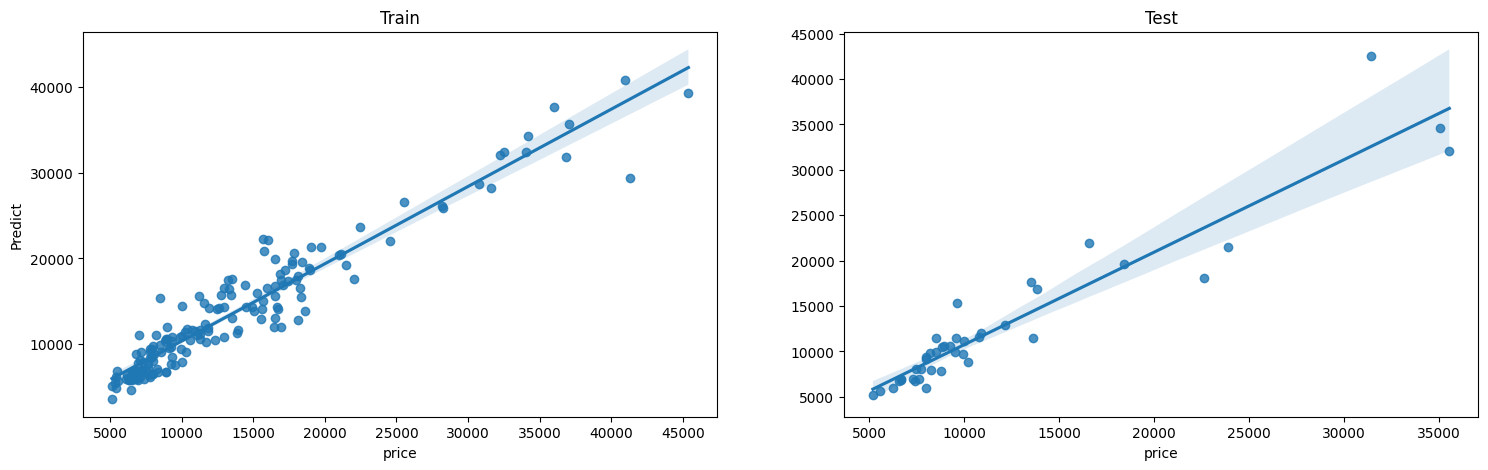

In [31]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');



> ## Melhor Modelo Não Linear: **CATBOOST**



In [32]:
best_model_mnl = Pipeline(steps_modelos_nao_lineares.steps + [('catboost',CatBoostRegressor(random_state=42))])

best_model_mnl.fit(X_train, y_train)
y_pred_train = best_model_mnl.predict(X_train)
y_pred_test  = best_model_mnl.predict(X_test)

Learning rate set to 0.03077
0:	learn: 7904.0026482	total: 1.99ms	remaining: 1.99s
1:	learn: 7746.2603624	total: 2.99ms	remaining: 1.49s
2:	learn: 7593.0424391	total: 3.95ms	remaining: 1.31s
3:	learn: 7451.0772659	total: 4.89ms	remaining: 1.22s
4:	learn: 7298.5030310	total: 5.8ms	remaining: 1.15s
5:	learn: 7163.2859107	total: 8.35ms	remaining: 1.38s
6:	learn: 7035.1932568	total: 9.89ms	remaining: 1.4s
7:	learn: 6905.8259830	total: 11.7ms	remaining: 1.46s
8:	learn: 6774.1758631	total: 12.8ms	remaining: 1.4s
9:	learn: 6651.9181237	total: 13.7ms	remaining: 1.35s
10:	learn: 6530.0291377	total: 14.6ms	remaining: 1.31s
11:	learn: 6401.8263791	total: 15.5ms	remaining: 1.27s
12:	learn: 6305.5204162	total: 16.3ms	remaining: 1.24s
13:	learn: 6215.7380516	total: 17.3ms	remaining: 1.22s
14:	learn: 6102.6601384	total: 18.1ms	remaining: 1.19s
15:	learn: 5995.0252756	total: 19ms	remaining: 1.17s
16:	learn: 5888.8985633	total: 20.1ms	remaining: 1.16s
17:	learn: 5783.6763168	total: 21.1ms	remaining: 1.

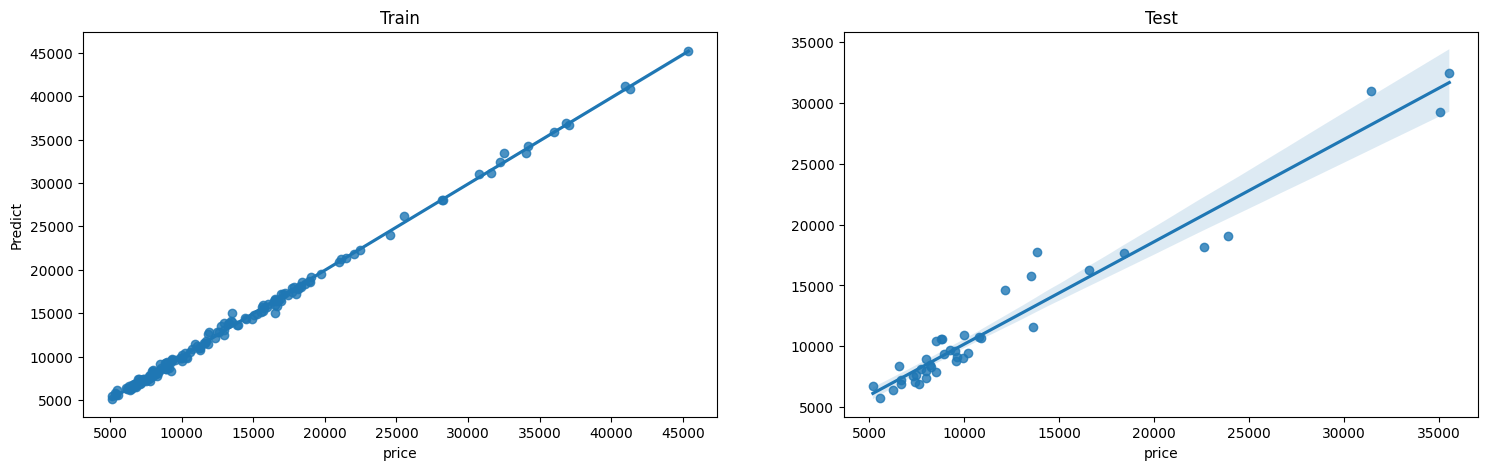

In [33]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

# **FEATURE SELECTION**

In [34]:
# Pré-processamento
X_train_transformed = steps_modelos_nao_lineares.fit_transform(X_train)
X_test_transformed  = steps_modelos_nao_lineares.transform(X_test)

In [35]:
# Criando DataFrame para armazenar os resultados
df_resultados_comparacao = pd.DataFrame(columns=['Método FS', 'Base', 'R2', 'MSE', 'MAE', 'MAPE'])

# Lista de métodos de Feature Selection
metodos_fs = {
    'SelectByShuffling': SelectByShuffling(estimator=CatBoostRegressor(), scoring='neg_mean_absolute_error', cv=5),
    'SelectKBest': SelectKBest(score_func=f_regression, k=10),  # Seleciona as 10 melhores features
    'RFE': RFE(estimator=CatBoostRegressor(), n_features_to_select=10)  # Seleciona 10 features recursivamente
}

# Loop para aplicar cada método e treinar o modelo
for nome_fs, metodo in metodos_fs.items():
    # Aplicar Feature Selection
    metodo.fit(X_train_transformed, y_train)

    # Identificar as features selecionadas
    if hasattr(metodo, 'features_to_drop_'):
        X_train_reduzido = metodo.transform(X_train_transformed)
        X_test_reduzido = metodo.transform(X_test_transformed)
    else:
        X_train_reduzido = metodo.transform(X_train_transformed)
        X_test_reduzido = metodo.transform(X_test_transformed)

    # Treinar o modelo CatBoost com o conjunto reduzido
    modelo = CatBoostRegressor(random_state=42)
    modelo.fit(X_train_reduzido, y_train)

    # Fazer o predict na base de treino
    y_pred_train = modelo.predict(X_train_reduzido)

    # Calcular as métricas para a base de treino
    df_resultados_comparacao.loc[len(df_resultados_comparacao)] = [
        nome_fs, 'train',
        r2_score(y_train, y_pred_train),
        mean_squared_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_percentage_error(y_train, y_pred_train)
    ]

    # Fazer o predict na base de teste
    y_pred_test = modelo.predict(X_test_reduzido)

    # Calcular as métricas para a base de teste
    df_resultados_comparacao.loc[len(df_resultados_comparacao)] = [
        nome_fs, 'test',
        r2_score(y_test, y_pred_test),
        mean_squared_error(y_test, y_pred_test),
        mean_absolute_error(y_test, y_pred_test),
        mean_absolute_percentage_error(y_test, y_pred_test)
    ]


A saída de streaming foi truncada nas últimas 5000 linhas.
190:	learn: 1279.3156091	total: 175ms	remaining: 742ms
191:	learn: 1274.8206633	total: 176ms	remaining: 741ms
192:	learn: 1271.3221007	total: 177ms	remaining: 740ms
193:	learn: 1268.3341131	total: 178ms	remaining: 739ms
194:	learn: 1264.6167780	total: 179ms	remaining: 738ms
195:	learn: 1259.6849772	total: 180ms	remaining: 736ms
196:	learn: 1254.3922219	total: 180ms	remaining: 735ms
197:	learn: 1251.5019361	total: 181ms	remaining: 734ms
198:	learn: 1246.6621376	total: 182ms	remaining: 733ms
199:	learn: 1239.0229848	total: 184ms	remaining: 736ms
200:	learn: 1233.5451617	total: 185ms	remaining: 737ms
201:	learn: 1229.9432682	total: 187ms	remaining: 738ms
202:	learn: 1227.9854075	total: 188ms	remaining: 739ms
203:	learn: 1222.3402285	total: 190ms	remaining: 743ms
204:	learn: 1217.7685659	total: 192ms	remaining: 743ms
205:	learn: 1215.4796917	total: 193ms	remaining: 743ms
206:	learn: 1212.0979375	total: 194ms	remaining: 742ms
207:	l

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A saída de streaming foi truncada nas últimas 5000 linhas.
4:	learn: 7344.6666620	total: 5.33ms	remaining: 1.06s
5:	learn: 7202.7214112	total: 6.29ms	remaining: 1.04s
6:	learn: 7055.3075261	total: 7.04ms	remaining: 999ms
7:	learn: 6929.7626658	total: 7.82ms	remaining: 970ms
8:	learn: 6799.4060435	total: 8.98ms	remaining: 989ms
9:	learn: 6695.7152740	total: 10.1ms	remaining: 1s
10:	learn: 6579.7710647	total: 11.3ms	remaining: 1.01s
11:	learn: 6452.0378383	total: 12ms	remaining: 989ms
12:	learn: 6329.8888902	total: 12.8ms	remaining: 969ms
13:	learn: 6221.4144181	total: 13.4ms	remaining: 947ms
14:	learn: 6116.4790508	total: 14.4ms	remaining: 947ms
15:	learn: 5992.3255638	total: 14.9ms	remaining: 919ms
16:	learn: 5890.2543476	total: 16.7ms	remaining: 963ms
17:	learn: 5788.8232949	total: 17.9ms	remaining: 978ms
18:	learn: 5690.4521485	total: 19.2ms	remaining: 991ms
19:	learn: 5587.5168554	total: 23.1ms	remaining: 1.13s
20:	learn: 5488.6252077	total: 24.3ms	remaining: 1.13s
21:	learn: 5407.0

In [36]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados_comparacao.loc[df_resultados_comparacao['Base'] == 'train'].sort_values(by='R2', ascending=False)

,Método FS,Base,R2,MSE,MAE,MAPE
0,SelectByShuffling,train,0.9972,183138.7093,320.1005,0.0288
2,SelectKBest,train,0.9970,196649.4784,330.8194,0.0293
4,RFE,train,0.9969,200627.1095,338.3749,0.0304


In [37]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados_comparacao.loc[df_resultados_comparacao['Base'] == 'test'].sort_values(by='R2', ascending=False)

,Método FS,Base,R2,MSE,MAE,MAPE
3,SelectKBest,test,0.9320,3751898.2034,1350.1084,0.1126
5,RFE,test,0.9159,4641449.5547,1362.9081,0.1084
1,SelectByShuffling,test,0.9159,4644578.8402,1411.3081,0.1102


> ## Melhor Feature Selection: **SELECT K BEST**



In [38]:
seletor_kbest = SelectKBest(score_func=f_regression, k=10)
seletor_kbest.fit(X_train_transformed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(score_func=<function f_regression at 0x7a570a377560>)

In [39]:
# Obtendo as máscaras de seleção
variaveis_selecionadas = seletor_kbest.get_support()  # Retorna um array booleano

# Calculando as quantidades antes e depois da seleção
qtde_variaveis_antes = X_train_transformed.shape[1]
qtde_variaveis_depois = sum(variaveis_selecionadas)
qtde_variaveis_removidas = qtde_variaveis_antes - qtde_variaveis_depois

# Exibindo os resultados corretamente
print(f"Qtde de variáveis antes da remoção: {qtde_variaveis_antes}")
print(f"Qtde de variáveis a serem removidas: {qtde_variaveis_removidas}")
print(f"Qtde de variáveis depois da remoção: {qtde_variaveis_depois}")

Qtde de variáveis antes da remoção: 42
Qtde de variáveis a serem removidas: 32
Qtde de variáveis depois da remoção: 10


In [40]:
# Aplicando Seleção de Variáveis
X_train_transformed_reduzido = seletor_kbest.transform(X_train_transformed)
X_test_transformed_reduzido  = seletor_kbest.transform(X_test_transformed)

In [41]:
# Teinando o Best Model
catboost = CatBoostRegressor(random_state=42)

catboost.fit(X_train_transformed_reduzido, y_train)

y_pred_train = catboost.predict(X_train_transformed_reduzido)
y_pred_test  = catboost.predict(X_test_transformed_reduzido)

Learning rate set to 0.03077
0:	learn: 7904.7971915	total: 1.01ms	remaining: 1.01s
1:	learn: 7753.3098202	total: 1.75ms	remaining: 871ms
2:	learn: 7586.9926739	total: 2.46ms	remaining: 816ms
3:	learn: 7438.3827321	total: 3.22ms	remaining: 801ms
4:	learn: 7301.6626258	total: 4.01ms	remaining: 798ms
5:	learn: 7138.6907338	total: 4.97ms	remaining: 823ms
6:	learn: 6990.2856581	total: 5.98ms	remaining: 848ms
7:	learn: 6840.0388235	total: 6.84ms	remaining: 849ms
8:	learn: 6714.3257073	total: 8.42ms	remaining: 928ms
9:	learn: 6593.1060490	total: 9.05ms	remaining: 896ms
10:	learn: 6492.2262012	total: 9.67ms	remaining: 869ms
11:	learn: 6365.9809601	total: 10.3ms	remaining: 846ms
12:	learn: 6251.3381915	total: 10.9ms	remaining: 827ms
13:	learn: 6141.2468024	total: 11.5ms	remaining: 808ms
14:	learn: 6045.4615820	total: 11.8ms	remaining: 773ms
15:	learn: 5936.8675834	total: 12.4ms	remaining: 762ms
16:	learn: 5813.5272781	total: 13.1ms	remaining: 755ms
17:	learn: 5694.6782495	total: 13.7ms	remainin

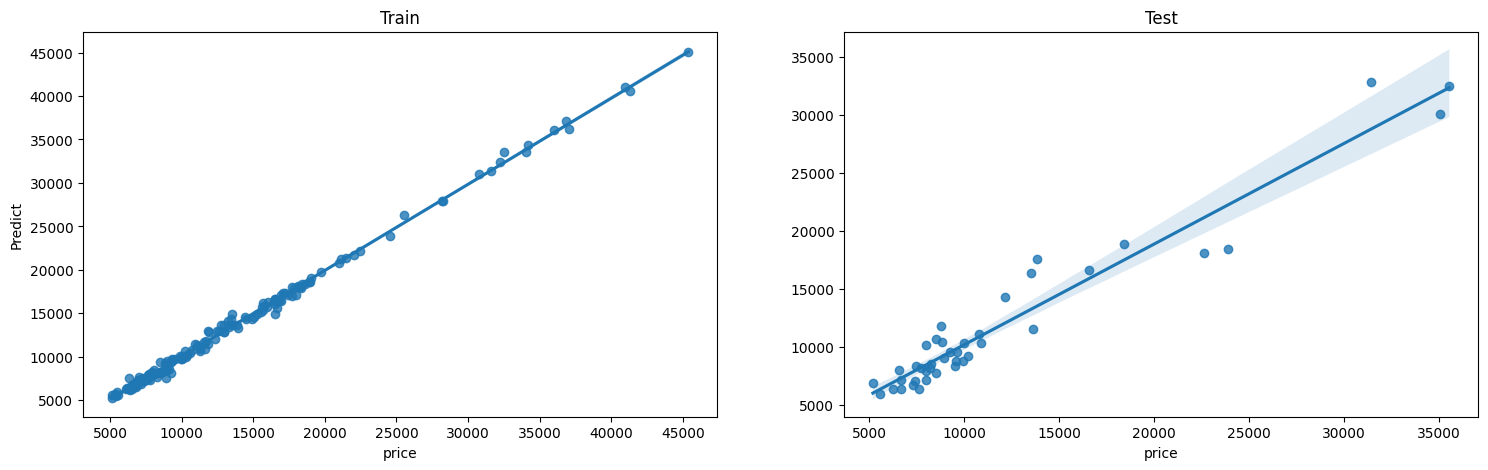

In [42]:
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

**Conclusão:** Mesmo realizando a Feature Selection com parâmetro SelectKBest, os resultados não superaram o Modelo Não Linear de Catboost puro.

A diferença foi muito pequena porém consideramos o Catboost melhor por não necessitar de um maior processamento dos dados

# **HIPERPARÂMETROS**

In [43]:
# Iniciar contagem de tempo
t1 = time.time()

# Criar um pipeline com Ridge Regression
pipeline_ridge = Pipeline(steps=steps_modelos_lineares.steps + [('ridge_reg', Ridge())])

# Definir os hiperparâmetros para teste
parametros = {
    'ridge_reg__alpha': [0.1, 1.0, 10.0, 100.0],  # Testando diferentes valores de alpha
    'ridge_reg__fit_intercept': [True, False]  # Testando com e sem intercepto
}

# Criar o GridSearchCV para otimização
grid_search_ridge = GridSearchCV(pipeline_ridge, parametros, scoring='neg_median_absolute_error', cv=5, n_jobs=-1, verbose=1)

# Treinar o GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print()
print('=' * 100)
print(f"Melhores parâmetros encontrados: {grid_search_ridge.best_params_}")
print(f"\nDemorou {time.time() - t1:.2f} segundos para GridSearch com Ridge Regression")
print('=' * 100)
print()

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Melhores parâmetros encontrados: {'ridge_reg__alpha': 10.0, 'ridge_reg__fit_intercept': True}

Demorou 5.45 segundos para GridSearch com Ridge Regression



In [46]:
# Iniciar contagem de tempo
t1 = time.time()

# Criar pipeline com CatBoostRegressor
pipeline_catboost = Pipeline(steps=steps_modelos_nao_lineares.steps + [
    ('catboost', CatBoostRegressor(verbose=0, random_state=42))
])

# Definir os hiperparâmetros para testar (reduzidos)
parametros = {
    'catboost__depth': [4, 6],
    'catboost__learning_rate': [0.05, 0.1],
    'catboost__iterations': [500,1000],
    'catboost__l2_leaf_reg': [1, 3],
}

# Criar RandomizedSearchCV para otimização mais rápida
random_search_catboost = RandomizedSearchCV(
    pipeline_catboost,
    parametros,
    scoring='neg_median_absolute_error',
    cv=5,  # Reduzindo o número de folds
    n_iter=6,  # Número limitado de combinações testadas
    n_jobs=-1,  # Paralelização
    verbose=1,
    random_state=42
)

# Treinar o RandomizedSearchCV
random_search_catboost.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print()
print('=' * 100)
print(f"Melhores parâmetros encontrados: {random_search_catboost.best_params_}")
print(f"\nDemorou {time.time() - t1:.2f} segundos para RandomizedSearch com CatBoostRegressor")
print('=' * 100)
print()


Fitting 5 folds for each of 6 candidates, totalling 30 fits

Melhores parâmetros encontrados: {'catboost__learning_rate': 0.1, 'catboost__l2_leaf_reg': 1, 'catboost__iterations': 500, 'catboost__depth': 4}

Demorou 28.65 segundos para RandomizedSearch com CatBoostRegressor

